<a href="https://colab.research.google.com/github/BDZG10/IntArt.FIME/blob/main/Actividades/AF7_RNP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Cargar Librerías

In [40]:
# Actividad 7: Redes Neuronales Artificiales
# Equipo:
# N4 Cesar Ballin Rodriguez-2132117
# N4 Brandon Daniel Zavala Gaytan 2055952
# N4 Dylan Jesús Cuéllar Aranda 2042806
# N4 Letizia Isabel García Vargas 2056273
# N5 Erick Escárcega Esparza 2132268
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score

2. Cargar Datos

In [41]:
keras.datasets.mnist.load_data(path="mnist.npz")

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

3. Preprocesamiento de datos

In [42]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [43]:
x_train = x_train / 255.0
x_test = x_test / 255.0

4. Selección y entrenamiento del modelo

In [44]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax') # Agregar la capa Densa de salida con 10 unidades (para 10 clases) y activación softmax
])

In [52]:
model.compile(optimizer='adam', # Adam optimizer is a good default choice
              loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy for integer labels
              metrics=['accuracy'])

trained = model.fit(x_train, y_train, epochs=10) # Train for a few epochs

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9948 - loss: 0.0155
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9969 - loss: 0.0091
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9953 - loss: 0.0146
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9973 - loss: 0.0081
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9970 - loss: 0.0085
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9972 - loss: 0.0088
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9976 - loss: 0.0082
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9973 - loss: 0.0105
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9975 - loss: 0.0071
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9971 - loss: 0.0090


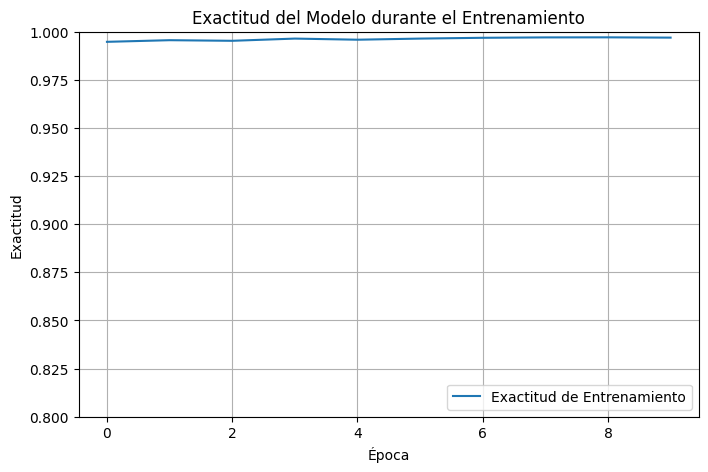

In [55]:
plt.figure(figsize=(8, 5))
plt.plot(trained.history['accuracy'], label='Exactitud de Entrenamiento')
plt.title('Exactitud del Modelo durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Exactitud')
plt.ylim([0.8, 1]) # Ajusta el rango del eje Y si es necesario para mejor visualización
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

5. Prueba del modelo

In [46]:
loss, accuracy = model.evaluate(x_test, y_test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9771 - loss: 0.0979
Test Loss: 0.08718893676996231
Test Accuracy: 0.9807999730110168


In [49]:
sample_images = x_test[:5]
sample_true_labels = y_test[:5]

predictions = model.predict(sample_images)

predicted_classes = np.argmax(predictions, axis=1)

for i in range(5):
    print(f"Predicción para imagen {i+1}: {predicted_classes[i]}, Valor Real: {sample_true_labels[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicción para imagen 1: 7, Valor Real: 7
Predicción para imagen 2: 2, Valor Real: 2
Predicción para imagen 3: 1, Valor Real: 1
Predicción para imagen 4: 0, Valor Real: 0
Predicción para imagen 5: 4, Valor Real: 4


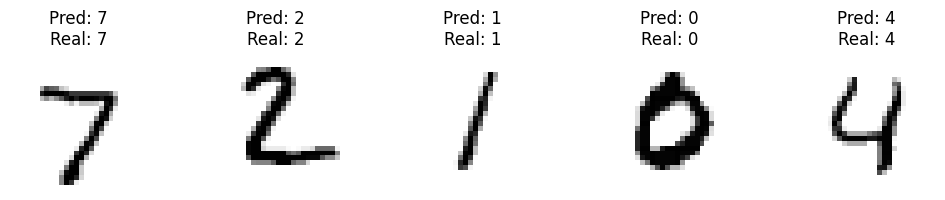

In [50]:
plt.figure(figsize=(10, 2))
for i in range(5):
     plt.subplot(1, 5, i + 1)
     plt.imshow(sample_images[i].reshape(28, 28), cmap=plt.cm.binary)
     plt.title(f"Pred: {predicted_classes[i]}\nReal: {sample_true_labels[i]}")
     plt.axis('off')
plt.tight_layout()
plt.show()